In [174]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
from scipy.stats import shapiro
from statsmodels.stats.multitest import multipletests

In [ ]:
def age_category(age):
  if age < 10:
    return 0
  elif age > 9 and age < 16:
    return 1
  elif age < 20:
    return 2
  elif age < 25:
    return 3
  elif age < 35:
    return 4
  elif age < 45:
    return 5
  elif age < 55:
    return 6
  elif age < 65:
    return 7
  elif age < 75:
    return 8
  elif age > 74:
    return 9

data = pd.read_csv("habits.data", sep=";", na_values="?")




data['kohde'] = data['kohde'].astype('category')
data['jasen'] = data['jasen'].astype('category')
data['pvknro'] = data['pvknro'].astype('category')
data['sp'] = data['sp'].astype('category')
data['ASALUE'] = data['ASALUE'].astype('category')
data['IKAL1'] = data['IKAL1'].apply(age_category)
data['IKAL1'] = data['IKAL1'].astype('category')
data['A1'] = pd.to_numeric(data['A1'], errors='coerce')
data['A2'] = pd.to_numeric(data['A2'], errors='coerce')
data['A3'] = pd.to_numeric(data['A3'], errors='coerce')
data['A4'] = pd.to_numeric(data['A4'], errors='coerce')
data['A5'] = data['A5'].astype('category')

print(data.dtypes)
print(data)

0      1.0
1      1.0
2      2.0
3      2.0
4      1.0
      ... 
740    2.0
741    1.0
742    1.0
743    2.0
744    2.0
Name: sp, Length: 745, dtype: float64

In [176]:
#Set labels for the data types
def age_category(age):
  if age > 9 and age < 16:
    return 1
  elif age < 20:
    return 2
  elif age < 25:
    return 3
  elif age < 35:
    return 4
  elif age < 45:
    return 5
  elif age < 55:
    return 6
  elif age < 65:
    return 7
  elif age < 75:
    return 8
  elif age > 74:
    return 9

data['kohde'] = data['kohde'].astype('category')
data['jasen'] = data['jasen'].astype('category')
data['pvknro'] = data['pvknro'].astype('category')
data['sp'] = data['sp'].astype('category')
data['ASALUE'] = data['ASALUE'].astype('category')
data['IKAL1'] = data['IKAL1'].apply(age_category)
data['IKAL1'] = data['IKAL1'].astype('category')
data['A1'] = pd.to_numeric(data['A1'], errors='coerce')
data['A2'] = pd.to_numeric(data['A2'], errors='coerce')
data['A3'] = pd.to_numeric(data['A3'], errors='coerce')
data['A4'] = pd.to_numeric(data['A4'], errors='coerce')
data['A5'] = data['A5'].astype('category')

print(data.dtypes)
print(data)

kohde     category
jasen     category
pvknro    category
sp        category
ASALUE    category
IKAL1     category
A1         float64
A2         float64
A3         float64
A4         float64
A5        category
dtype: object
     kohde jasen pvknro sp ASALUE IKAL1     A1     A2    A3     A4   A5
0    50002     1      1  1    1.0     6    0.0  560.0   0.0   80.0  1.0
1    50002     1      2  1    1.0     6  380.0  450.0  10.0    0.0  1.0
2    50003     1      1  2    2.0     5    0.0  470.0  30.0  100.0  1.0
3    50003     1      2  2    2.0     5    0.0  550.0   0.0    0.0  1.0
4    50004     2      1  1    1.0     7  640.0  410.0   0.0    0.0  1.0
..     ...   ...    ... ..    ...   ...    ...    ...   ...    ...  ...
740  51980     1      2  2    2.0     6  460.0  450.0  31.0    0.0  2.0
741  51981     2      1  1    1.0     5    0.0  470.0   0.0  140.0  NaN
742  51981     2      2  1    1.0     5    0.0  730.0   NaN    0.0  NaN
743  51983     1      1  2    3.0     8  560.0  375.0  20

In [177]:
print(data.isnull().sum())
df = data.dropna()
df.loc[df['A5'] == 420, 'A5'] = 1.0



kohde      0
jasen      0
pvknro     0
sp         0
ASALUE     0
IKAL1      0
A1        85
A2        88
A3        94
A4        91
A5        42
dtype: int64


In [178]:
#Identification of the characters present in the data
#First set of simple groups are sp, asalue, pvknro ja ikal1
def shapiro_test(x):
    stat, p = shapiro(x)
    return pd.Series({
        'Shapiro_Statistic': stat,
        'Shapiro_p': p,
        'Normal?': 'Yes' if p > 0.05 else 'No'
    })

sp                   
1   Shapiro_Statistic    0.618192
    Shapiro_p                 0.0
    Normal?                    No
2   Shapiro_Statistic    0.634786
    Shapiro_p                 0.0
    Normal?                    No
Name: A1, dtype: object
sp                   
1   Shapiro_Statistic    0.973686
    Shapiro_p             0.00004
    Normal?                    No
2   Shapiro_Statistic    0.988714
    Shapiro_p            0.015153
    Normal?                    No
Name: A2, dtype: object
sp                   
1   Shapiro_Statistic    0.702049
    Shapiro_p                 0.0
    Normal?                    No
2   Shapiro_Statistic    0.826272
    Shapiro_p                 0.0
    Normal?                    No
Name: A3, dtype: object
sp                   
1   Shapiro_Statistic    0.730908
    Shapiro_p                 0.0
    Normal?                    No
2   Shapiro_Statistic    0.774996
    Shapiro_p                 0.0
    Normal?                    No
Name: A4, dtype: object


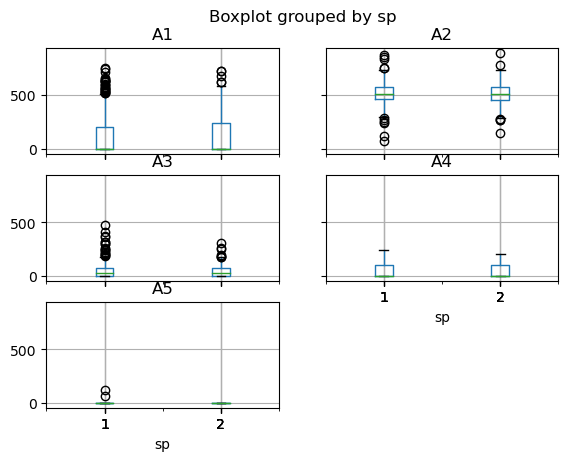

In [179]:
df.boxplot(column=['A1','A2','A3','A4','A5'], by='sp')
groups = ['A1','A2','A3','A4','A5']

for group in groups:
  normality_results = df.groupby('sp', observed=True)[group].apply(shapiro_test)
  print(normality_results)

In [180]:
results = []

for group in groups:
  result = df.groupby('sp', observed=True)[group].apply(list).pipe(lambda g: kruskal(*g))
  results.append(result)
  
print(pd.DataFrame(results))

   statistic    pvalue
0   0.005148  0.942802
1   0.175280  0.675462
2   0.266338  0.605799
3   1.459864  0.226952
4   2.915062  0.087756


The result for grouping by gender, there doesn't seem to be a statistically meningful difference between the genders.

ASALUE                   
1.0     Shapiro_Statistic    0.596212
        Shapiro_p                 0.0
        Normal?                    No
2.0     Shapiro_Statistic    0.693805
        Shapiro_p                 0.0
        Normal?                    No
3.0     Shapiro_Statistic    0.653758
        Shapiro_p                 0.0
        Normal?                    No
Name: A1, dtype: object
ASALUE                   
1.0     Shapiro_Statistic    0.982659
        Shapiro_p            0.000186
        Normal?                    No
2.0     Shapiro_Statistic    0.975405
        Shapiro_p            0.055841
        Normal?                   Yes
3.0     Shapiro_Statistic    0.963242
        Shapiro_p            0.001523
        Normal?                    No
Name: A2, dtype: object
ASALUE                   
1.0     Shapiro_Statistic    0.749549
        Shapiro_p                 0.0
        Normal?                    No
2.0     Shapiro_Statistic    0.742914
        Shapiro_p                 0.0


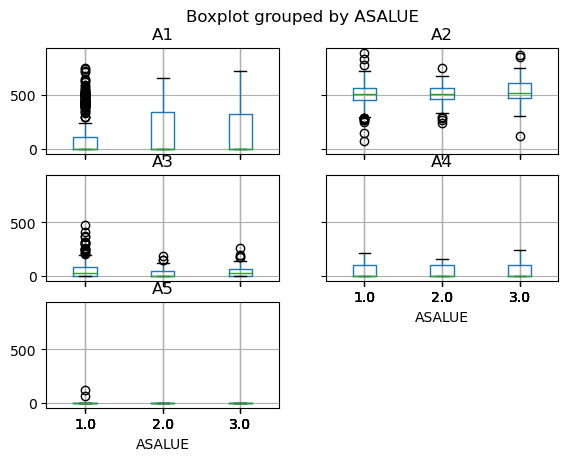

In [181]:
df.boxplot(column=groups, by='ASALUE')

for group in groups:
  normality_results = df.groupby('ASALUE', observed=True)[group].apply(shapiro_test)
  print(normality_results)

In [182]:
results = []
groups = ['A1','A2','A3','A4','A5']

for group in groups:
  result = df.groupby('ASALUE', observed=True)[group].apply(list).pipe(lambda g: kruskal(*g))
  results.append(result)
  
results = pd.DataFrame(results)
print(results)

   statistic    pvalue
0   3.137442  0.208311
1   4.078625  0.130118
2  15.617102  0.000406
3   0.466166  0.792088
4   4.628177  0.098856


In [183]:
reject, pvals_corrected, _, _=multipletests(results['pvalue'], alpha=0.05, method='bonferroni')
print("Original p-values:", results['pvalue'])
print("Corrected p-values:", pvals_corrected)
print("Reject H₀ (significant?):", reject)

Original p-values: 0    0.208311
1    0.130118
2    0.000406
3    0.792088
4    0.098856
Name: pvalue, dtype: float64
Corrected p-values: [1.         0.65059059 0.00203123 1.         0.49428116]
Reject H₀ (significant?): [False False  True False False]


There seems to be a correlation between where you live and the ammount of reading you do.

pvknro                   
1       Shapiro_Statistic    0.640937
        Shapiro_p                 0.0
        Normal?                    No
2       Shapiro_Statistic     0.61282
        Shapiro_p                 0.0
        Normal?                    No
Name: A1, dtype: object
pvknro                   
1       Shapiro_Statistic    0.973624
        Shapiro_p            0.000022
        Normal?                    No
2       Shapiro_Statistic    0.985613
        Shapiro_p            0.004566
        Normal?                    No
Name: A2, dtype: object
pvknro                   
1       Shapiro_Statistic    0.733053
        Shapiro_p                 0.0
        Normal?                    No
2       Shapiro_Statistic    0.743163
        Shapiro_p                 0.0
        Normal?                    No
Name: A3, dtype: object
pvknro                   
1       Shapiro_Statistic    0.729948
        Shapiro_p                 0.0
        Normal?                    No
2       Shapiro_Statistic 

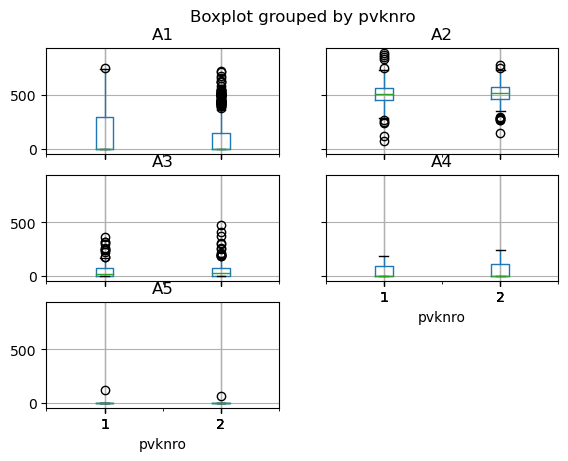

In [184]:
df.boxplot(column=groups, by='pvknro')

for group in groups:
  normality_results = df.groupby('pvknro', observed=True)[group].apply(shapiro_test)
  print(normality_results)

In [185]:
results = []

for group in groups:
  result = df.groupby('pvknro', observed=True)[group].apply(list).pipe(lambda g: kruskal(*g))
  results.append(result)

results = pd.DataFrame(results)
print(results)

   statistic    pvalue
0   0.502682  0.478324
1   2.273186  0.131629
2   5.432775  0.019762
3   7.474073  0.006259
4   0.018188  0.892721


In [186]:
reject, pvals_corrected, _, _=multipletests(results['pvalue'], alpha=0.05, method='bonferroni')
print("Original p-values:", results['pvalue'])
print("Corrected p-values:", pvals_corrected)
print("Reject H₀ (significant?):", reject)

Original p-values: 0    0.478324
1    0.131629
2    0.019762
3    0.006259
4    0.892721
Name: pvalue, dtype: float64
Corrected p-values: [1.         0.65814546 0.09881127 0.03129689 1.        ]
Reject H₀ (significant?): [False False False  True False]


There seems to be a correlation with the day of the week and the ammount of dining at a restaurant that you do.

IKAL1                   
3      Shapiro_Statistic     0.67769
       Shapiro_p            0.000097
       Normal?                    No
4      Shapiro_Statistic    0.698576
       Shapiro_p                 0.0
       Normal?                    No
5      Shapiro_Statistic    0.727281
       Shapiro_p                 0.0
       Normal?                    No
6      Shapiro_Statistic     0.77446
       Shapiro_p                 0.0
       Normal?                    No
7      Shapiro_Statistic    0.483352
       Shapiro_p                 0.0
       Normal?                    No
8      Shapiro_Statistic    0.260782
       Shapiro_p                 0.0
       Normal?                    No
9      Shapiro_Statistic    0.211919
       Shapiro_p                 0.0
       Normal?                    No
Name: A1, dtype: object
IKAL1                   
3      Shapiro_Statistic    0.929035
       Shapiro_p            0.235347
       Normal?                   Yes
4      Shapiro_Statistic    0.985439
 

/usr/lib/python3/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


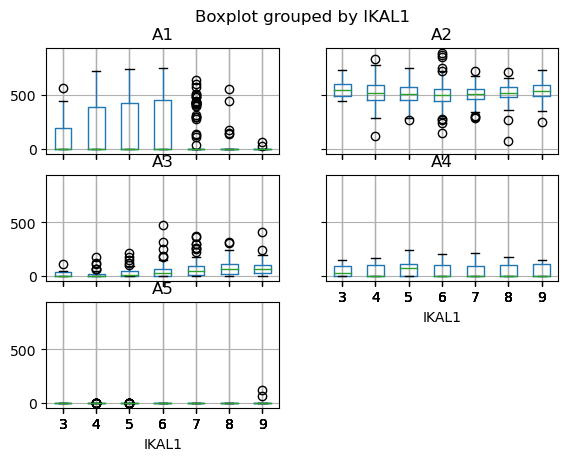

In [187]:
df.boxplot(column=groups, by='IKAL1')

for group in groups:
  normality_results = df.groupby('IKAL1', observed=True)[group].apply(shapiro_test)
  print(normality_results)

In [188]:
results = []

for group in groups:
  result = df.groupby('IKAL1', observed=True)[group].apply(list).pipe(lambda g: kruskal(*g))
  results.append(result)

results = pd.DataFrame(results)
print(results)

   statistic        pvalue
0  78.073877  8.925562e-15
1  13.277149  3.883994e-02
2  87.436993  1.031478e-16
3   6.016452  4.213496e-01
4  42.297831  1.605839e-07


In [189]:
reject, pvals_corrected, _, _=multipletests(results['pvalue'], alpha=0.05, method='bonferroni')
print("Original p-values:", results['pvalue'])
print("Corrected p-values:", pvals_corrected)
print("Reject H₀ (significant?):", reject)

Original p-values: 0    8.925562e-15
1    3.883994e-02
2    1.031478e-16
3    4.213496e-01
4    1.605839e-07
Name: pvalue, dtype: float64
Corrected p-values: [4.46278089e-14 1.94199692e-01 5.15738794e-16 1.00000000e+00
 8.02919370e-07]
Reject H₀ (significant?): [ True False  True False  True]


There seems to be a correlation between age and the following activities: working, reading and visiting a library.